In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import image as im
from matplotlib import pyplot as pp

In [30]:
image_path = 'E:\\Dataset Multispectral\\Dataset_Mapir\\NormalRGN_Unpad\\2024_0618\\A1.JPG'

In [31]:
import os

def check_image_path(image_path):
  """
  Checks if the given image path exists.

  Args:
      image_path: Path to the image file.

  Returns:
      True if the path exists, False otherwise.
  """
  return os.path.exists(image_path)

# Example usage
if check_image_path(image_path):
  print(f"Image path exists: {image_path}")
else:
  print(f"Image path does not exist: {image_path}")

Image path exists: E:\Dataset Multispectral\Dataset_Mapir\NormalRGN_Unpad\2024_0618\A1.JPG


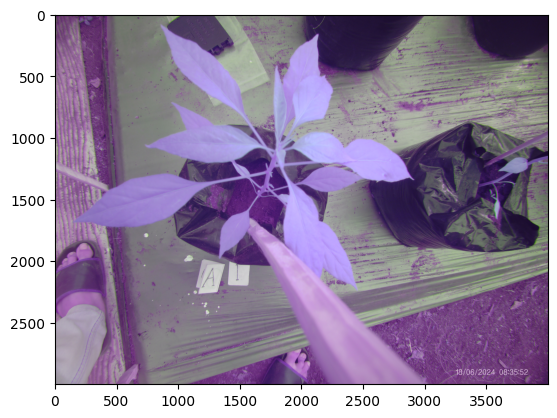

In [32]:
image = im.imread(image_path)
pp.imshow(image)

In [33]:
from numpy import copy, transpose

# Extract the red, green, and blue channels
red_channel = copy(image[:, :, 0])
green_channel = copy(image[:, :, 1])
nir_channel = copy(image[:, :, 2])

red_channel = red_channel.astype(np.float32)
green_channel = green_channel.astype(np.float32)
nir_channel = nir_channel.astype(np.float32)

# red_channel[red_channel<170] = 0
# green_channel[green_channel<170] = 0
# nir_channel[nir_channel<170] = 0

In [34]:
image

array([[[ 76,  28,  88],
        [ 77,  29,  89],
        [ 76,  31,  88],
        ...,
        [ 25,  14,  46],
        [ 24,  15,  46],
        [ 24,  15,  46]],

       [[ 78,  33,  92],
        [ 78,  33,  92],
        [ 77,  32,  89],
        ...,
        [ 25,  14,  46],
        [ 25,  14,  46],
        [ 25,  14,  46]],

       [[ 86,  41, 100],
        [ 80,  35,  94],
        [ 76,  33,  89],
        ...,
        [ 25,  14,  46],
        [ 25,  14,  44],
        [ 25,  14,  44]],

       ...,

       [[148, 142, 152],
        [150, 144, 154],
        [148, 145, 154],
        ...,
        [ 66,  31,  87],
        [ 66,  33,  88],
        [ 64,  31,  86]],

       [[149, 144, 151],
        [151, 146, 153],
        [149, 146, 153],
        ...,
        [ 64,  29,  83],
        [ 62,  29,  84],
        [ 62,  29,  84]],

       [[149, 144, 151],
        [151, 146, 153],
        [149, 146, 153],
        ...,
        [ 62,  27,  81],
        [ 64,  31,  84],
        [ 69,  36,  89]]

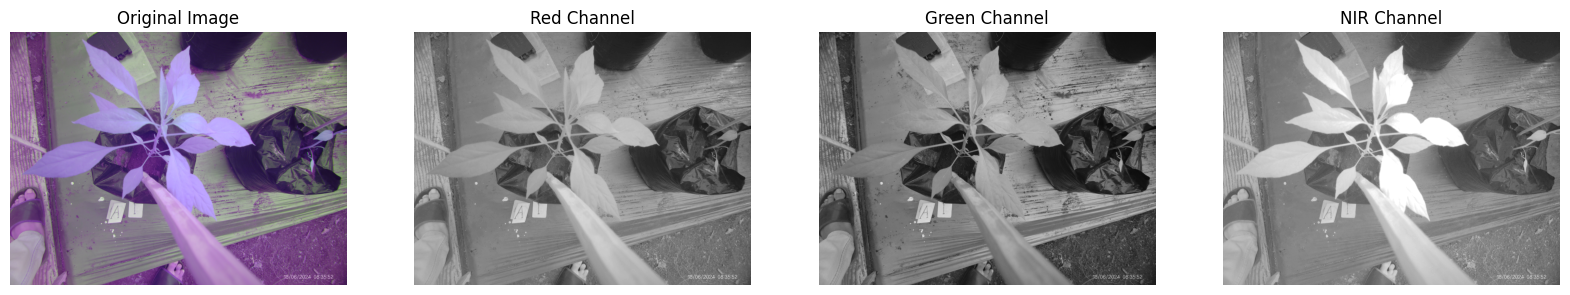

In [35]:
# Display the original image and the individual color channels
plt.figure(figsize=(20, 8))
plt.subplot(1, 4, 1)
plt.imshow(image)
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 4, 2)
plt.imshow(red_channel, cmap='gray')
plt.title('Red Channel')
plt.axis('off')

plt.subplot(1, 4, 3)
plt.imshow(green_channel, cmap='gray')
plt.title('Green Channel')
plt.axis('off')

plt.subplot(1, 4, 4)
plt.imshow(nir_channel, cmap='gray')
plt.title('NIR Channel')
plt.axis('off')

plt.show()

In [36]:
from numpy import isnan, nan_to_num

# Calculate NDVI with error handling for division by zero
ndvi = (nir_channel - red_channel) / (nir_channel + red_channel)

ndvi[isnan(ndvi)] = 0
# ndvi = nan_to_num(ndvi, nan=0.0, posinf=0.0, neginf=0.0)

ndvi

C:\Users\OMEN\AppData\Local\Temp\ipykernel_19140\1810436535.py:4: RuntimeWarning: invalid value encountered in divide
  ndvi = (nir_channel - red_channel) / (nir_channel + red_channel)


array([[0.07317073, 0.07228915, 0.07317073, ..., 0.29577464, 0.31428573,
        0.31428573],
       [0.08235294, 0.08235294, 0.07228915, ..., 0.29577464, 0.29577464,
        0.29577464],
       [0.07526882, 0.08045977, 0.07878788, ..., 0.29577464, 0.2753623 ,
        0.2753623 ],
       ...,
       [0.01333333, 0.01315789, 0.01986755, ..., 0.13725491, 0.14285715,
        0.14666666],
       [0.00666667, 0.00657895, 0.01324503, ..., 0.1292517 , 0.15068494,
        0.15068494],
       [0.00666667, 0.00657895, 0.01324503, ..., 0.13286713, 0.13513513,
        0.12658228]], dtype=float32)

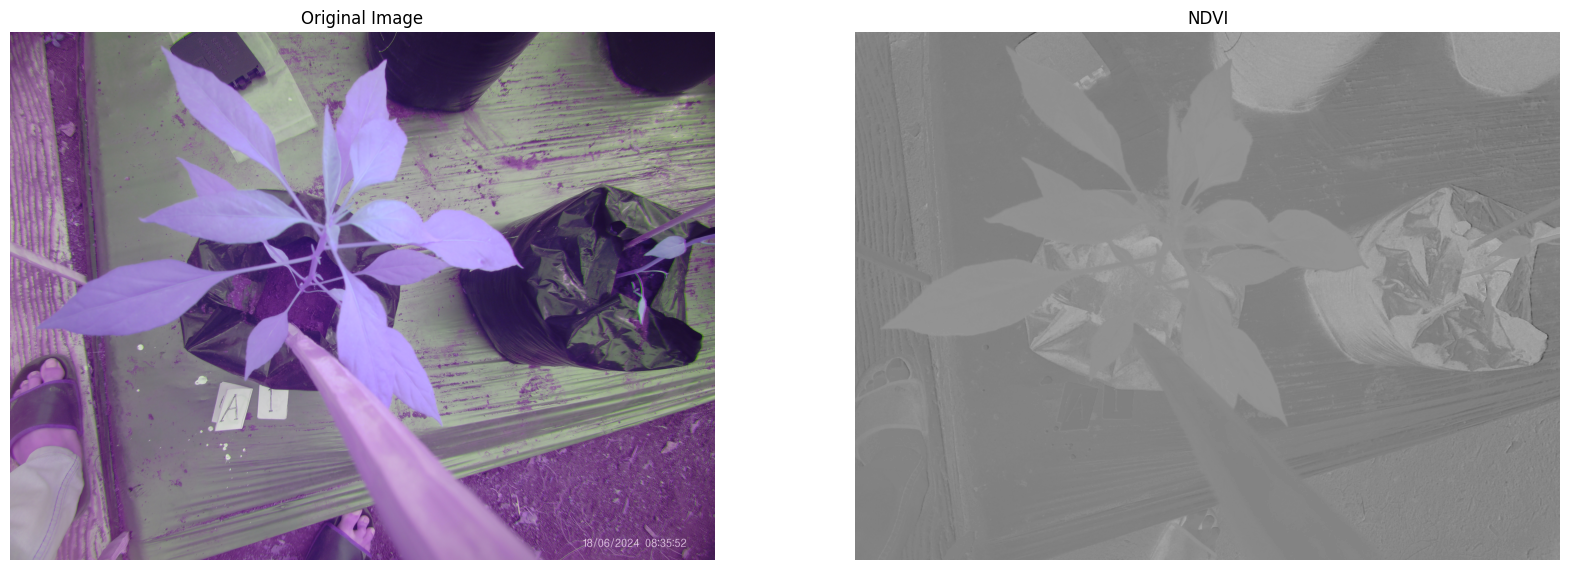

In [37]:
# Display the modified image (showing each channel separately)
plt.figure(figsize=(20, 8))

plt.subplot(1, 2, 1)
plt.imshow(image)
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(ndvi, cmap='gray')
plt.title('NDVI')
plt.axis('off')
plt.show()

NDVI : 0.12894838172269749
Class : Unhealthy Plants


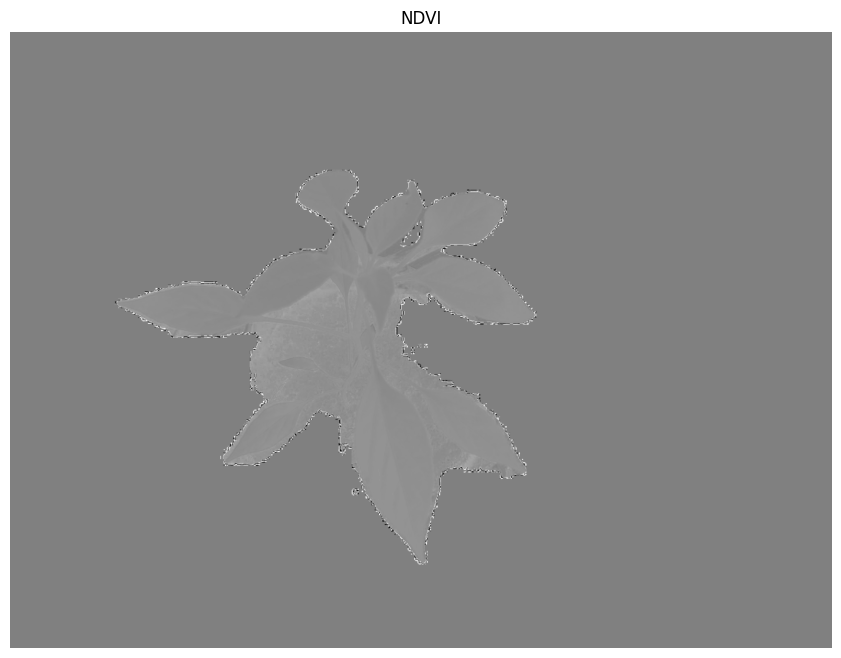

In [20]:
from numpy import count_nonzero, sum, size

n_ndvi = count_nonzero(ndvi)

x_ndvi = sum(ndvi)

avg_ndvi = x_ndvi / n_ndvi

print(f"NDVI : {avg_ndvi}")

if avg_ndvi <= 0:
  kelas = "Dead Plants"
elif avg_ndvi <= 0.30:
  kelas = "Unhealthy Plants"
elif avg_ndvi <= 0.60:
  kelas = "Moderatly Healthy Plants"
else:
  kelas = "Very Healthy Plants"

print(f"Class : {kelas}")

# Display the modified image (showing each channel separately)
plt.figure(figsize=(20, 8))
plt.subplot(1, 1, 1)
plt.imshow(ndvi, cmap='gray')
plt.title('NDVI')
plt.axis('off')
plt.show()